In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank_marketing_dataset.csv')
df.head()

C:\Users\addur\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [3]:
# skipping unwanted rows
df = pd.read_csv("bank_marketing_dataset.csv",skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### From above code we removed unwanted rows and columns which are irrelevent

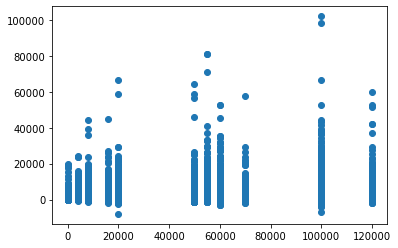

In [4]:
# NUMERICAL - NUMERICAL ASSOCIATIONS
plt.scatter(df.salary,df.balance)
plt.show()

### From the above scatter plot graph we plotted salary uder balance which are numeric in nature

In [5]:
# Information about my DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [6]:
# Dropping customerid that is not required further use
df.drop("customerid",axis=1,inplace=True)
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
# Dividing job from jobedu because it contains both job and education
df['job']= df.jobedu.apply(lambda x: x.split(",")[0])
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [8]:
# Dividing education from jobedu
df['education']= df.jobedu.apply(lambda x: x.split(",")[1])
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [9]:
# We have divided jobedu into 2 parts job and education, now then just drop jobedu which is not used in further process
df.drop("jobedu",axis=1, inplace=True)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [10]:
# To check null values
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

### In age we found 20 null values and in months we found 50 null values
### We have to remove null values from both

In [11]:
# Count the missing values in age column.
df.age.isnull().sum()

20

In [12]:
# Shape of DataFrame
df.shape

(45211, 19)

In [13]:
# Calculate the percentage of missing values in age column.
float(100.0*20/45211)

0.04423702196368141

### Drop the records with age missing

In [14]:
#drop the records with age missing in df and copy in df1 dataframe.
df1= df[-df.age.isnull()].copy()
df1.shape

(45191, 19)

### handling missing values in month column

In [15]:
# Count the missing values in month column in df1
df1.month.isnull().sum()

50

In [16]:
# Print the percentage of each month in the data frame df1
df1.month.value_counts(normalize=True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [17]:
# Find the mode of month in df1
month_mode = df1.month.mode()[0]
month_mode

'may, 2017'

In [18]:
# Fill the missing values with mode value of month in df1
df1.month.fillna(month_mode, inplace=True)
df1.month.value_counts(normalize=True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [19]:
# Let's see the null values in the month column
df1.month.isnull().sum()

0

In [20]:
# Dimensions of DataFrame
df1.ndim

2

In [21]:
# To find Central location of data from df1
df1.mean()

C:\Users\addur\AppData\Local\Temp/ipykernel_20040/3208839689.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean()


age            40.935651
salary      57005.974641
balance      1362.432520
day            15.806289
campaign        2.763847
pdays          40.181253
previous        0.579983
dtype: float64

In [22]:
# To find median value of a data set
df1.median()

C:\Users\addur\AppData\Local\Temp/ipykernel_20040/3370463481.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.median()


age            39.0
salary      60000.0
balance       448.0
day            16.0
campaign        2.0
pdays          -1.0
previous        0.0
dtype: float64

In [23]:
# To find values that appears most often
df1.mode()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,32.0,20000,0,married,yes,no,yes,no,cellular,20,"may, 2017",1.5 min,1,-1,0,unknown,no,blue-collar,secondary


In [24]:
# Standard deviation
df1.std()

C:\Users\addur\AppData\Local\Temp/ipykernel_20040/1813207459.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.std()


age            10.619198
salary      32084.253154
balance      3045.120417
day             8.322311
campaign        3.098407
pdays         100.074099
previous        2.303017
dtype: float64

In [25]:
# Variance
df1.var()

C:\Users\addur\AppData\Local\Temp/ipykernel_20040/2871271835.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.var()


age         1.127674e+02
salary      1.029399e+09
balance     9.272758e+06
day         6.926086e+01
campaign    9.600128e+00
pdays       1.001483e+04
previous    5.303887e+00
dtype: float64

In [26]:
# Correlation
corr = df1.corr()
corr

,age,salary,balance,day,campaign,pdays,previous
age,1.000000,0.024374,0.097755,-0.009184,0.004851,-0.023783,0.001330
salary,0.024374,1.000000,0.055505,0.027875,0.014902,-0.015099,0.014546
balance,0.097755,0.055505,1.000000,0.004501,-0.014501,0.003443,0.016704
day,-0.009184,0.027875,0.004501,1.000000,0.162426,-0.092986,-0.051620
campaign,0.004851,0.014902,-0.014501,0.162426,1.000000,-0.088659,-0.032870
pdays,-0.023783,-0.015099,0.003443,-0.092986,-0.088659,1.000000,0.454286
previous,0.001330,0.014546,0.016704,-0.051620,-0.032870,0.454286,1.000000


### To calculate the correlation between the numeric variables we can use heatmap to find correlation among them

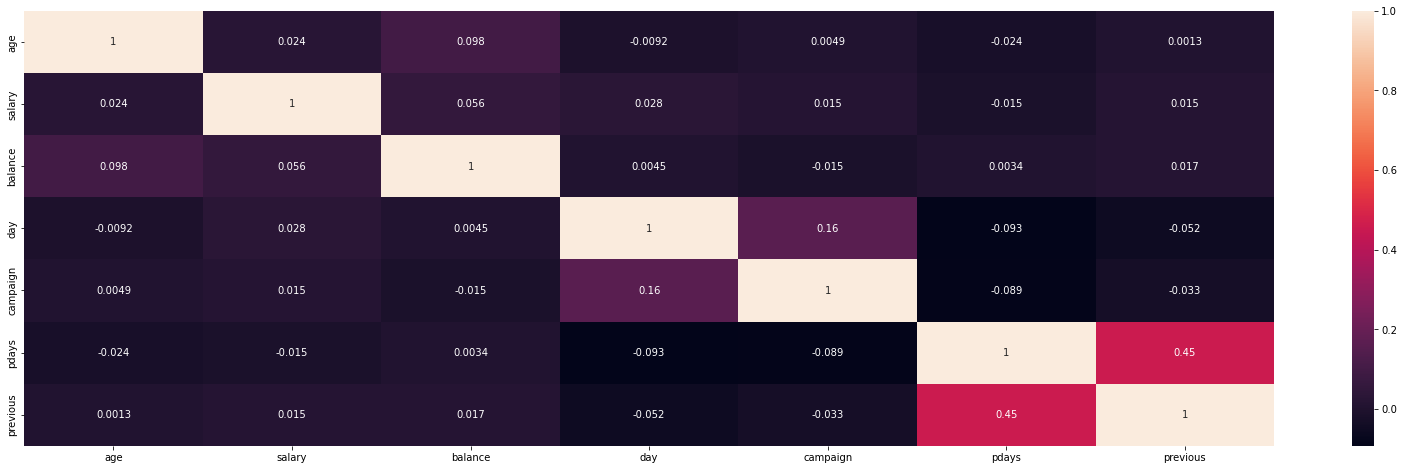

In [27]:
plt.subplots(figsize=(28,8))
corr = df1.corr()
sns.heatmap(corr,annot=True,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values);
plt.show()

In [28]:
# The skew () method calculates the skew for each column
# The skew () method searches column-wise and returns the skew of each row
df1.skew()

C:\Users\addur\AppData\Local\Temp/ipykernel_20040/336109200.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew()


age          0.685001
salary       0.137725
balance      8.360728
day          0.092958
campaign     4.898854
pdays        2.612255
previous    41.885391
dtype: float64

In [29]:
# describe() is used to calculate some statistical data like percentile,mean,standard deviation,count.
df1.describe()

,age,salary,balance,day,campaign,pdays,previous
count,45191.000000,45191.000000,45191.000000,45191.000000,45191.000000,45191.000000,45191.000000
mean,40.935651,57005.974641,1362.432520,15.806289,2.763847,40.181253,0.579983
std,10.619198,32084.253154,3045.120417,8.322311,3.098407,100.074099,2.303017
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [30]:
# Describe the pdays column of df1
df1.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

#### -1 indicates the missing values. Missing value does not always be present as null. How to handle it:

#### Objective is:

#### you should ignore the missing values in the calculations
#### simply make it missing - replace -1 with NaN.
#### all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [31]:
# describe the pdays column with considering the -1 values
df1.loc[df1.pdays<0,"pdays"] = np.NaN
df1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [32]:
# describe the age variable in df1
df1.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

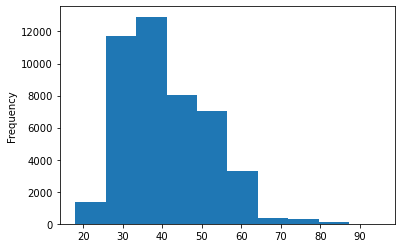

In [33]:
# hist () function in matplotlib helps the users to create histograms,reads the array of a numpy and sends it as an argument to the function
df1.age.plot.hist()
plt.show()

C:\Users\addur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


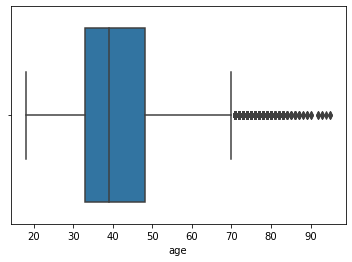

In [34]:
# Plot the boxplot of age variable
# To find summary of the set of data values
sns.boxplot(df1.age)
plt.show()

### From above boxplot we ploted outlayers, above the age group of 70.

In [35]:
# describe the salary variable of df1
df1.salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

C:\Users\addur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


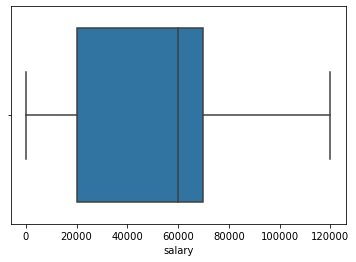

In [36]:
# plot the boxplot of salary variable
sns.boxplot(df1.salary)
plt.show()

In [38]:
# describe the balance variable of df1
df1.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

C:\Users\addur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


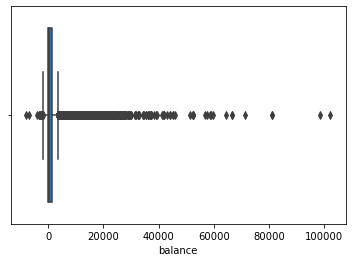

In [39]:
# plot the boxplot of balance variable
sns.boxplot(df1.balance)
plt.show()

In [40]:
# Calculate the percentage of each marital status category
df1.marital.value_counts(normalize=True)

married     0.601978
single      0.282932
divorced    0.115089
Name: marital, dtype: float64

### Just plot in a bar graph for better understanding

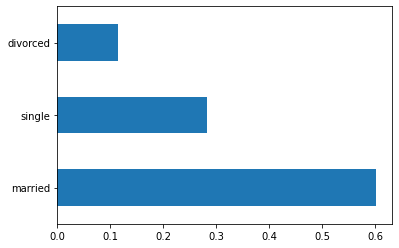

In [41]:
# plot the bar graph of percentage marital status categories
df1.marital.value_counts(normalize=True).plot.barh()
plt.show()

In [42]:
# Calculate the percentage of each job status categor
df1.job.value_counts(normalize=True)

blue-collar      0.215242
management       0.209223
technician       0.168042
admin.           0.114403
services         0.091877
retired          0.050076
self-employed    0.034918
entrepreneur     0.032861
unemployed       0.028811
housemaid        0.027417
student          0.020756
unknown          0.006373
Name: job, dtype: float64

### Just plot in a bar graph for better understanding

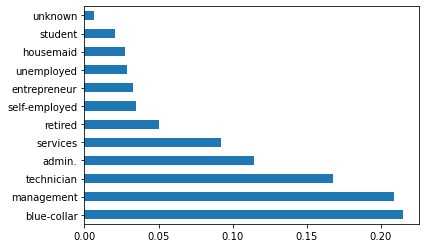

In [43]:
# Plot the bar graph of percentage job categories
df1.job.value_counts(normalize=True).plot.barh()
plt.show()